# Solution - Exercice 5 of TD 1

### Check your environment for troubleshooting if necessary

In [1]:
import gym
import numpy as np
import matplotlib as mplt
import sys

print("python : ", sys.version)
print("numpy :", np.__version__)
print("gym :", gym.__version__)
print("matplotlib :", mplt.__version__)

python :  3.9.1 (default, Dec 13 2020, 11:55:53) 
[GCC 10.2.0]
numpy : 1.19.4
gym : 0.18.0
matplotlib : 3.3.3


### Necessary imports

In [2]:
import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

Using [discover.py](https://www.eleves.ens.fr/home/pesquere/MDP_X/discover.py), create the environement.

In [3]:
# Create environment
env = gym.make('FrozenLake-v0')

def to_s(row,col):
    return row*env.ncol + col

def to_row_col(s):
    col = s % env.ncol
    row = s // env.ncol
    return row, col

NBR_EPISODES = 100
HORIZON = 200
GAMMA = 0.9

## Question 3

In [4]:
##### Question 3 #####
print("\n##### Question 3 #####\n")

VALUE_START = np.zeros(NBR_EPISODES)
for i in range(NBR_EPISODES):
    env.reset()
    done = False
    t = 0
    discount = 1
    while (not done) and (t < HORIZON):
        t += 1
        discount *= GAMMA
        next_state, r, done, _ = env.step(fl.RIGHT)
        VALUE_START[i] += discount * r

print(f"Monte Carlo estimation of the Value at starting point: \
{np.mean(VALUE_START):.3f}")


##### Question 3 #####

Monte Carlo estimation of the Value at starting point: 0.020


## Question 4

In [5]:
##### Question 4 #####
print("\n##### Question 4 #####\n")

def value_function(pi):
    """
    pi : int array
    For each index i, pi[i] is the action (int) chosen in state i

    return:
    ------
    V_pi : float array
    For each index i, V_pi[i] is the value (float) of the state i
    """
    # Compute both the reward vector r_pi and
    # transition matrix P_pi associated to the policy on the given env
    r_pi = np.zeros((env.nS))
    P_pi = np.zeros((env.nS, env.nS))
    for state in range(env.nS):
        transitions_info = env.P[state][pi[state]]
        for transition in transitions_info:
            proba = transition[0]
            next_state = transition[1]
            reward = transition[2]
            P_pi[state,next_state] += proba
            r_pi[state] += reward*proba
    # Compute the value function of the policy pi
    Id = np.eye(env.nS)
    return np.linalg.inv(Id - GAMMA*P_pi) @ r_pi

simple_pi = fl.RIGHT*np.ones((env.nS))

V_simple_pi = value_function(simple_pi)
print(f"Value function of the always RIGHT policy:\n{V_simple_pi}")
print(f"Value estimate of the starting point: {V_simple_pi[0]:.3f}")


##### Question 4 #####

Value function of the always RIGHT policy:
[1.308e-02 1.176e-02 2.744e-02 2.034e-16 1.875e-02 6.168e-17 6.402e-02
 2.712e-16 4.944e-02 1.460e-01 1.860e-01 0.000e+00 0.000e+00 3.008e-01
 5.559e-01 0.000e+00]
Value estimate of the starting point: 0.013


## Question 5


##### Question 5 #####

Value function of the always RIGHT policy:
[0.013 0.012 0.027 0.    0.019 0.    0.064 0.    0.049 0.146 0.186 0.
 0.    0.301 0.556 0.   ]


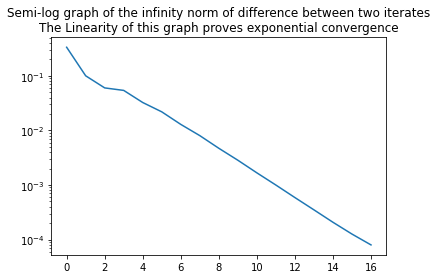

Number of iterations: 17
Last residual 7.988610483180246e-05


In [6]:
##### Question 5 #####
print("\n##### Question 5 #####\n")

def value_function_2(pi, epsilon, max_iter):
    """
    pi : int array
    For each index i, pi[i] is the action (int) chosen in state i

    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    return:
    ------
    V_pi : float array
    For each index i, V_pi[i] is the value (float) of the state i
    """
    # Compute both the reward vector r_pi and
    # transition matrix P_pi associated to the policy on the given env
    r_pi = np.zeros((env.nS))
    P_pi = np.zeros((env.nS, env.nS))
    for state in range(env.nS):
        transitions_info = env.P[state][pi[state]]
        for transition in transitions_info:
            proba = transition[0]
            next_state = transition[1]
            reward = transition[2]
            P_pi[state,next_state] += proba
            r_pi[state] += reward*proba
    # Compute the value function V_pi of the policy pi
    V_pi = np.zeros((env.nS))
    V_pi_old = np.zeros((env.nS))
    delta_linf = np.zeros((max_iter))
    stop = False
    i = 0
    while (not stop) and (i < max_iter):
        V_pi = r_pi + GAMMA * (P_pi @ V_pi_old)
        delta_linf[i] = np.max(np.abs(V_pi-V_pi_old))
        V_pi_old[:] = V_pi
        if delta_linf[i]<epsilon:
            stop = True
            delta_linf = delta_linf[:i+1]
        i += 1
    return V_pi, delta_linf

V_simple_pi, delta_linf = value_function_2(simple_pi, 1e-4, 10000)
print(f"Value function of the always RIGHT policy:\n{V_simple_pi}")
plt.figure()
plt.title("Semi-log graph of the infinity norm of difference between \
two iterates\nThe Linearity of this graph proves exponential convergence")
plt.semilogy(delta_linf)
plt.show()
print("Number of iterations:", delta_linf.size)
print("Last residual", delta_linf[-1])

## Question 6


##### Question 6 #####

Optimal value function:
[0.068 0.061 0.074 0.055 0.091 0.    0.112 0.    0.145 0.247 0.299 0.
 0.    0.38  0.639 0.   ]


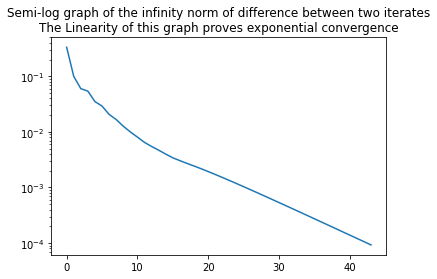

Number of iterations: 44
Last residual 9.272422715012052e-05


In [7]:
##### Question 6 #####
print("\n##### Question 6 #####\n")

def value_function_optimal(epsilon, max_iter):
    """
    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    returns:
    -------
    V_opt : float array, (env.nS,) size
    Optimal value function on the FrozenLake MDP given a discount GAMMA
    V_opt[state index] = Value of that state
    """
    V_opt_old = np.zeros((env.nS))
    V_opt = np.zeros((env.nS))
    delta_linf = np.zeros((max_iter))
    i = 0
    stop = False
    while (not stop) and (i < max_iter):
        for state in range(env.nS):
            # Q is the local (slice) state-action value function for 'state'
            Q = np.zeros((env.nA))
            for action in range(env.nA):
                transitions_info = env.P[state][action]
                for transition in transitions_info:
                    proba  = transition[0]
                    next_state = transition[1]
                    reward  = transition[2]
                    Q[action] += proba*(reward + GAMMA*V_opt_old[next_state])
            V_opt[state] = np.max(Q)
        delta_linf[i] = np.max(np.abs(V_opt_old-V_opt))
        np.copyto(V_opt_old, V_opt)
        if delta_linf[i] < epsilon:
            delta_linf = delta_linf[:i+1]
            stop = True
        i += 1
    return V_opt, delta_linf

V_opt, delta_linf = value_function_optimal(1e-4, 10000)
print(f"Optimal value function:\n{V_opt}")
plt.figure()
plt.title("Semi-log graph of the infinity norm of difference between \
two iterates\nThe Linearity of this graph proves exponential convergence")
plt.semilogy(delta_linf)
plt.show()
print("Number of iterations:", delta_linf.size)
print("Last residual", delta_linf[-1])

## Question 7

In [8]:
##### Question 7 #####
print("\n##### Question 7 #####\n")

def value_iteration(epsilon,max_iter):
    """
    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    returns:
    -------
    pi : int array, size (env.nS,)
    An optimal policy
    """
    # Compute the optimal value function
    V_opt, _ = value_function_optimal(epsilon,max_iter)

    # Compute the state-action value function in order to
    # select the/a greedy action in each state.
    Q = np.zeros((env.nS, env.nA))
    for state in range(env.nS):
        for action in range(env.nA):
            transitions_info = env.P[state][action]
            for transition in transitions_info:
                proba  = transition[0]
                next_state = transition[1]
                reward  = transition[2]
                Q[state, action] += proba*(reward + GAMMA*V_opt[next_state])

    # Go greedy in the action selection
    # 'np.argmax' breaks ties by selecting the minimal index in the array
    pi_opt = np.argmax(Q, axis=1)
    return pi_opt

def print_policy(pi):
    for row in range(env.nrow):
        for col in range(env.ncol):
            print(pi[to_s(row,col)], end='')
        print("")

print(f"Actions index: RIGHT: {fl.RIGHT} - LEFT: {fl.LEFT}")
print(f"               UP: {fl.UP}    - DOWN: {fl.DOWN}")
pi_opt = value_iteration(1e-4, 1000)
print("\nAn optimal policy is:\n")
print_policy(pi_opt)


##### Question 7 #####

Actions index: RIGHT: 2 - LEFT: 0
               UP: 3    - DOWN: 1

An optimal policy is:

0303
0000
3100
0210


## Question 8

In [9]:
##### Question 8 #####
print("\n##### Question 8 #####\n")

# The danger of Policy Iteration lies in the stopping criterion
# If not careful, one might end up with an algorithm that does not
# terminate and oscillates between optimal policies
# Even if it is computationally more expensive, we sometimes rather
# compare value functions of the policies than policies from one iterate
# to another.

# An easy improvement on the following code would be to use
# a warm start for policy evaluation steps (if iteration methods is used)
# That is to say, using the previously computed value function
# as the first step for the next policy evaluation

def policy_improvement(V):
    """
    V : float array, size (env.nS,)
    Value function of a policy

    returns:
    -------
    pi : int array, size (env.nS,)
    A policy that is greedy with respect to V
    """
    # Compute state-value function associated to V
    Q = np.zeros((env.nS, env.nA))
    for state in range(env.nS):
        for action in range(env.nA):
            transitions_info = env.P[state][action]
            for transition in transitions_info:
                proba  = transition[0]
                next_state = transition[1]
                reward  = transition[2]
                Q[state, action] += proba*(reward + GAMMA*V[next_state])
    # Compute the/a greedy policy with respect to the Q/V value function
    pi = np.argmax(Q, axis=1)
    return pi

def policy_iteration(epsilon, max_iter):
    """
    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    returns:
    -------
    pi : int array, size (env.nS,)
    An optimal policy
    """
    pi = np.zeros((env.nS))
    pi_old = np.zeros((env.nS))
    V_pi = np.zeros((env.nS))
    stop = False
    i = 0
    while (not stop) and (i < max_iter):
        pi_old = np.copy(pi)
        V_pi_old = np.copy(V_pi)

        # policy evaluation
        V_pi = value_function(pi) # test value_function_2 too !

        # policy improvement
        pi = policy_improvement(V_pi)

        i += 1
        stop = np.array_equal(pi, pi_old)
        # or, other criterion
        # stop = np.max(np.abs(V_pi - V_pi_old)) < epsilon
    return pi

print("\n")
print(f"Actions index: RIGHT: {fl.RIGHT} - LEFT: {fl.LEFT}")
print(f"               UP: {fl.UP}    - DOWN: {fl.DOWN}")
pi_opt = policy_iteration(1e-4, 1000)
print("\nAn optimal policy is:\n")
print_policy(pi_opt)


##### Question 8 #####



Actions index: RIGHT: 2 - LEFT: 0
               UP: 3    - DOWN: 1

An optimal policy is:

0303
0000
3100
0210


## Question 9


##### Question 9 #####

Optimal value function:
[0.068 0.061 0.074 0.055 0.091 0.    0.112 0.    0.145 0.247 0.299 0.
 0.    0.38  0.639 0.   ]


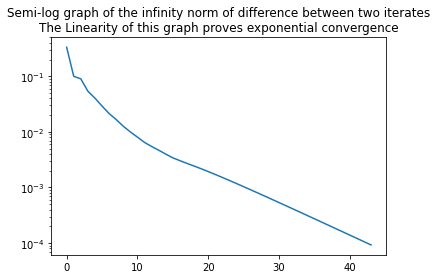

Number of iterations: 44
Last residual 9.272422715012052e-05


Actions index: RIGHT: 2 - LEFT: 0
               UP: 3    - DOWN: 1

An optimal policy is:

0303
0000
3100
0210


In [10]:
##### Question 9 #####
print("\n##### Question 9 #####\n")

def state_value_function_optimal(epsilon, max_iter):
    """
    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    returns:
    -------
    Q_opt : float array, (env.nS, env.nA) size
    Optimal state-action value function on the FrozenLake MDP
    given a discount GAMMA
    Q_opt[state index][action index] = state-action value of that state
    """
    Q_opt_old = np.zeros((env.nS, env.nA))
    delta_linf = np.zeros((max_iter))
    i = 0
    stop = False
    while (not stop) and (i < max_iter):
        Q_opt = np.zeros((env.nS, env.nA))
        for state in range(env.nS):
            for action in range(env.nA):
                transitions_info = env.P[state][action]
                for transition in transitions_info:
                    proba  = transition[0]
                    next_state = transition[1]
                    reward  = transition[2]
                    Q_opt[state][action] += proba*(reward + GAMMA*np.max(Q_opt_old[next_state]))
        delta_linf[i] = np.max(np.abs(Q_opt_old-Q_opt))
        np.copyto(Q_opt_old, Q_opt)
        if delta_linf[i] < epsilon:
            delta_linf = delta_linf[:i+1]
            stop = True
        i += 1
    return Q_opt, delta_linf

Q_opt, delta_linf = state_value_function_optimal(1e-4, 100)
# print(Q_opt)
V_opt = np.max(Q_opt, axis=1)
print(f"Optimal value function:\n{V_opt}")
plt.figure()
plt.title("Semi-log graph of the infinity norm of difference between \
two iterates\nThe Linearity of this graph proves exponential convergence")
plt.semilogy(delta_linf)
plt.show()
print("Number of iterations:", delta_linf.size)
print("Last residual", delta_linf[-1])

def Q_learning(epsilon, max_iter):
    """
    epsilon : float
    Used as a threshold for the stopping rule

    max_iter : int
    Hard threshold on the number of loops

    returns:
    -------
    pi_opt : int array, size (env.nS,)
    An optimal policy
    """
    Q_opt, _ = state_value_function_optimal(1e-4, 100)
    pi_opt = np.argamax(Q_opt, axis=1)
    return pi_opt

print("\n")
print(f"Actions index: RIGHT: {fl.RIGHT} - LEFT: {fl.LEFT}")
print(f"               UP: {fl.UP}    - DOWN: {fl.DOWN}")
pi_opt = value_iteration(1e-4, 1000)
print("\nAn optimal policy is:\n")
print_policy(pi_opt)